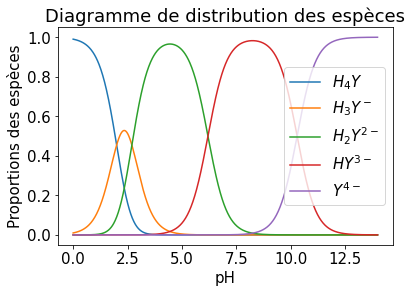

In [1]:

import sys
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15}) # On affiche plus gros pour les graphes



composes = ["$H_4Y$", "$H_3Y^-$", "$H_2Y^{2-}$", "$HY^{3-}$", "$Y^{4-}$"] # Noms des espèces chimiques classées par acidité (les plus acides en premier)
acidites = [2, 2.7, 6.2, 10.3] # Constantes d'acidite dans l'ordre (donner les pKa)

nb_points = 1000 #Nombre de points tracés




if(len(composes) != len(acidites) + 1):
    print("Erreur : il faut un nom de composés de plus que d'acidités ! Il y a actuellement", len(composes), "composés et", len(acidites), "acidités")
    sys.exit()
    
    
    
    
liste_pH = np.linspace(0, 14, nb_points) # Correspond à l'axe des X
liste_courbes = [[] for i in range(len(composes))] # Chaque point calculé est stocké ici



for pH in liste_pH :
    termes = [1] #Pour les calculs, voir brouillon
    for pKa in acidites :
        termes.append(10**(-pKa)*termes[-1]/10**(-pH))
        
    plus_acide = 1/sum(termes) # Proportion du terme le plus acide (AH3 2+ dans mon brouillon). Pour les calculs, voir brouillon
        
    for i in range(len(liste_courbes)) :
        liste_courbes[i].append(plus_acide*termes[i]) # Calculs : voir brouillon
        
        
        
for i in range(len(liste_courbes)) :
    plt.plot(liste_pH, liste_courbes[i], label=composes[i])

plt.title("Diagramme de distribution des espèces")
plt.legend()
plt.xlabel("pH")
plt.ylabel("Proportions des espèces")
plt.show()

In [28]:
def fampho(pKa1,pKa2):
    plt.figure(2)
    #définition de l'intervalle de points de calcul
    x = np.linspace(0, 14, num=1000)
    
    #calcul et tracé de la proportion en acide
    prop_acide = 100/(1+10**(x-pKa1)+10**(2*x-pKa1-pKa2))
    plt.plot(x, prop_acide,color = 'red',label = "acide") 
    #calcul et tracé de la proportion en amphotère
    plt.plot(x, prop_acide*10**(x-pKa1),color = 'green',label = "amphotère") 
    #calcul et tracé de la proportion en base
    plt.plot(x, prop_acide*10**(2*x-pKa1-pKa2),color = 'blue', label = 'base') 
    
    #mise en forme du graphique
    plt.ylim(-0.05*100, 1.05*100)
    plt.ylabel("Proportion (%)")
    plt.xlabel("pH")
    plt.legend()
    plt.show()
             
#actualisation de la barre d'actualisation dynamique
interactive_plot = interactive(fampho, pKa1=(2, 12,0.3333),pKa2=(2, 12,0.3333))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=6.999499999999999, description='pKa1', max=12.0, min=2.0, step=0.3333)…

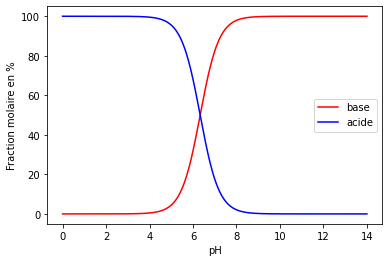

In [29]:
f(6.33)

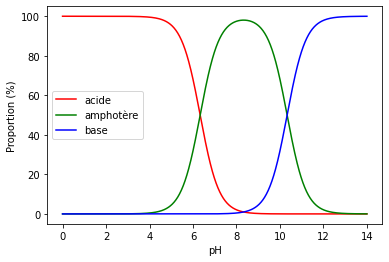

In [30]:
fampho(6.33,10.33)